In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.regression import linear_model
from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('data/Auto.csv')
data

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [3]:
data['horsepower'] = pd.to_numeric(data['horsepower'], errors='coerce')

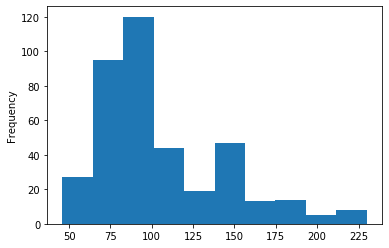

In [4]:
data['horsepower'].plot(kind='hist')

In [5]:
#as data is a bit left skewed, filling nan values with median
horse_med = data['horsepower'].median()
data['horsepower'] = data['horsepower'].fillna(horse_med)

In [6]:
data['horsepower'].isnull().sum()

0

In [7]:
#subsetting data for simple linear regression
y = data['mpg']
x = data['horsepower']

-0.1582017310100706 40.021250875495255


Text(0, 0.5, 'mpg')

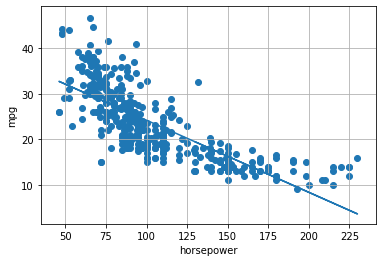

In [9]:
(m, b) = np.polyfit(x, y, 1)
print(m, b)

yp = np.polyval([m, b], x)
plt.plot(x, yp)
plt.grid(True)
plt.scatter(x,y)
plt.xlabel('horsepower')
plt.ylabel('mpg')

In [10]:
simple_model = linear_model.OLS(y, x).fit()

In [11]:
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.651
Model:                            OLS   Adj. R-squared (uncentered):              0.651
Method:                 Least Squares   F-statistic:                              740.2
Date:                Mon, 10 Feb 2020   Prob (F-statistic):                    1.15e-92
Time:                        17:34:35   Log-Likelihood:                         -1628.5
No. Observations:                 397   AIC:                                      3259.
Df Residuals:                     396   BIC:                                      3263.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
horsepower     0.1800      0.007     27.206      0.000       0.167       0.193
==============================================================================
Omnibus:                       13.732   Durbin-Watson:                   0.472
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               10.090
Skew:                          -0.281   Prob(JB):                      0.00644
Kurtosis:                       2.458   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### We can see regresseion plot of horsepower and mpg shows a negative trend. This is confirmed by our simple linear regressor as it gave a coeffecient of -0.1582

In [12]:
predictor = np.array([98.0]).reshape(-1,1)

In [38]:
simple_pred = simple_model.predict(predictor)

simple_pred

array([17.64107883])

### We now have to perform multiple regression on the whole data set. Excluding name feature which is not required.

In [14]:
data.drop('name',axis=1,inplace=True)

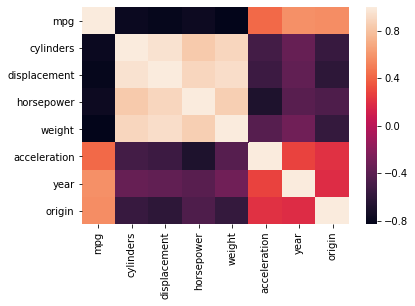

In [15]:
corr = data.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)

#### Some of the features are multi-correlated

In [16]:
X = data.drop('mpg', axis=1)
Y = data['mpg']

In [17]:
multi_model = linear_model.OLS(y, X).fit()

### Checking the coefficients and statistics of each predictor

In [18]:
multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.981
Method:                 Least Squares   F-statistic:                              2961.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):                        0.00
Time:                        17:34:44   Log-Likelihood:                         -1045.3
No. Observations:                 397   AIC:                                      2105.
Df Residuals:                     390   BIC:                                      2133.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
cylinders       -0.6770      0.324     -2.092      0.037      -1.313      -0.041
displacement     0.0212      0.008      2.780      0.006       0.006       0.036
horsepower      -0.0348      0.012     -2.820      0.005      -0.059      -0.011
weight          -0.0062      0.001     -9.673      0.000      -0.008      -0.005
acceleration    -0.0608      0.089     -0.682      0.495      -0.236       0.114
year             0.5820      0.024     24.186      0.000       0.535       0.629
origin           1.2785      0.279      4.576      0.000       0.729       1.828
==============================================================================
Omnibus:                       46.144   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               85.987
Skew:                           0.677   Prob(JB):                     2.13e-19
Kurtosis:                       4.834   Cond. No.                     5.99e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.99e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Except acceleration, all other features appear to have a low p-value and hence they are statistically significant

In [27]:
#creating dataframe with interaction terms
x_interaction = PolynomialFeatures(2, interaction_only=True, include_bias=False).fit_transform(X)

In [28]:
x_interaction = pd.DataFrame(x_interaction, columns = ['cylinders','displacement','horsepower','weight','acceleration','year','origin','cylinders:displacement','cylinders:horsepower','cylinders:weight','cylinders:acceleration','cylinders:year','cylinders:origin','displacement:horsepower','displacement:weight','displacement:acceleration','displacement:year','displacement:origin','horsepower:weight','horsepower:acceleration','horsepower:year','horsepower:origin','weight:acceleration','weight:year','weight:origin','acceleration:year','acceleration:origin','year:origin'])

In [30]:
x_interaction.head(5)

,cylinders,displacement,horsepower,weight,acceleration,year,origin,cylinders:displacement,cylinders:horsepower,cylinders:weight,...,horsepower:weight,horsepower:acceleration,horsepower:year,horsepower:origin,weight:acceleration,weight:year,weight:origin,acceleration:year,acceleration:origin,year:origin
0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,2456.0,1040.0,28032.0,...,455520.0,1560.0,9100.0,130.0,42048.0,245280.0,3504.0,840.0,12.0,70.0
1,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,2800.0,1320.0,29544.0,...,609345.0,1897.5,11550.0,165.0,42469.5,258510.0,3693.0,805.0,11.5,70.0
2,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,2544.0,1200.0,27488.0,...,515400.0,1650.0,10500.0,150.0,37796.0,240520.0,3436.0,770.0,11.0,70.0
3,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,2432.0,1200.0,27464.0,...,514950.0,1800.0,10500.0,150.0,41196.0,240310.0,3433.0,840.0,12.0,70.0
4,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,2416.0,1120.0,27592.0,...,482860.0,1470.0,9800.0,140.0,36214.5,241430.0,3449.0,735.0,10.5,70.0


In [31]:
#new model including the interaction terms
synergy_model = linear_model.OLS(y, x_interaction).fit()

In [32]:
synergy_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    mpg   R-squared (uncentered):                   0.989
Model:                            OLS   Adj. R-squared (uncentered):              0.988
Method:                 Least Squares   F-statistic:                              1180.
Date:                Mon, 10 Feb 2020   Prob (F-statistic):                        0.00
Time:                        17:44:21   Log-Likelihood:                         -943.31
No. Observations:                 397   AIC:                                      1943.
Df Residuals:                     369   BIC:                                      2054.
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
cylinders                     9.5317      7.542      1.264      0.207      -5.300      24.363
displacement                 -0.5288      0.177     -2.989      0.003      -0.877      -0.181
horsepower                    0.5601      0.269      2.082      0.038       0.031       1.089
weight                        0.0097      0.017      0.566      0.572      -0.024       0.043
acceleration                 -5.1384      1.314     -3.912      0.000      -7.722      -2.555
year                          1.0907      0.146      7.454      0.000       0.803       1.378
origin                      -19.6636      6.578     -2.989      0.003     -32.599      -6.728
cylinders:displacement       -0.0051      0.006     -0.802      0.423      -0.017       0.007
cylinders:horsepower          0.0098      0.023      0.424      0.672      -0.036       0.055
cylinders:weight              0.0004      0.001      0.483      0.630      -0.001       0.002
cylinders:acceleration        0.2724      0.163      1.668      0.096      -0.049       0.593
cylinders:year               -0.1998      0.092     -2.166      0.031      -0.381      -0.018
cylinders:origin              0.3265      0.492      0.664      0.507      -0.641       1.294
displacement:horsepower   -6.454e-05      0.000     -0.227      0.821      -0.001       0.000
displacement:weight        3.076e-05   1.44e-05      2.141      0.033     2.5e-06     5.9e-05
displacement:acceleration    -0.0037      0.003     -1.123      0.262      -0.010       0.003
displacement:year             0.0065      0.002      2.848      0.005       0.002       0.011
displacement:origin           0.0231      0.019      1.193      0.234      -0.015       0.061
horsepower:weight         -3.468e-05   2.86e-05     -1.214      0.226   -9.09e-05    2.15e-05
horsepower:acceleration      -0.0074      0.004     -2.026      0.043      -0.014      -0.000
horsepower:year              -0.0056      0.003     -1.676      0.095      -0.012       0.001
horsepower:origin            -0.0013      0.027     -0.048      0.961      -0.055       0.053
weight:acceleration           0.0002      0.000      1.034      0.302      -0.000       0.001
weight:year                  -0.0003      0.000     -1.510      0.132      -0.001    9.39e-05
weight:origin                -0.0003      0.002     -0.180      0.857      -0.003       0.003
acceleration:year             0.0488      0.017      2.814      0.005       0.015       0.083
acceleration:origin           0.4340      0.148      2.928      0.004       0.143       0.725
year:origin                   0.1279      0.070      1.838      0.067      -0.009       0.265
======================================================================

### There are many interaction terms with high p-value. So we need to filter only low p-value terms

In [36]:
synergy_model.pvalues[synergy_model.pvalues < 0.05]

displacement               2.990359e-03
horsepower                 3.801450e-02
acceleration               1.090979e-04
year                       6.520025e-13
origin                     2.983824e-03
cylinders:year             3.097188e-02
displacement:weight        3.295881e-02
displacement:year          4.651416e-03
horsepower:acceleration    4.349992e-02
acceleration:year          5.156504e-03
acceleration:origin        3.620364e-03
dtype: float64

### The above features are useful for our model which also includes the interaction terms. We need to include the both the features present in the interaction terms in the model even if both of them individually give low p-value scores(hierarchy principle)

### Above, cylinders gave high p-value but as cylinders:year gave low p-value and thus we have to include cylinders in the model